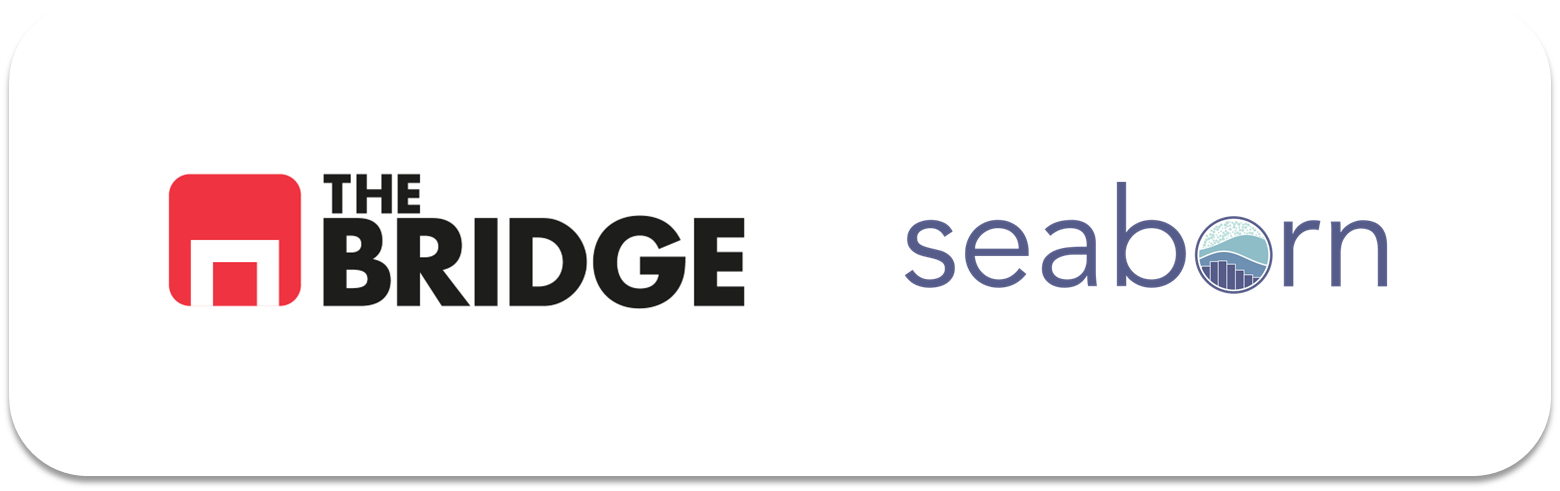

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nbformat as nbf

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [21]:
df = pd.read_csv("./data/california_cities.csv")
df = df.dropna()
df = df.reset_index(drop = True)
df.head(10)
# df['elevation_m'].describe()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
3,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
4,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57
5,7,AmadorCity,38.419444,-120.824167,280.0,919.0,185,0.314,0.314,0.000,0.813,0.813,0.000,0.00
6,8,AmericanCanyon,38.168056,-122.252500,14.0,46.0,19454,4.845,4.837,0.008,12.548,12.527,0.021,0.17
7,9,Anaheim,33.836111,-117.889722,48.0,157.0,336000,50.811,49.835,0.976,131.600,129.073,2.527,1.92
8,10,Anderson,40.452222,-122.296667,132.0,430.0,9932,6.620,6.372,0.248,17.145,16.504,0.642,3.74
9,11,AngelsCamp,38.068333,-120.539722,420.0,1378.0,3836,3.637,3.628,0.009,9.421,9.397,0.024,0.25


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [17]:
def scatter_plot(df, num_col1, num_col2, cat_col=None, size='size', scale=1/10000, legend=True):
    """
    Dibuja un diagrama de dispersión usando seaborn.

    Parámetros:
    df (DataFrame): DataFrame de Pandas.
    num_col1 (str): Nombre de la columna numérica para el eje X.
    num_col2 (str): Nombre de la columna numérica para el eje Y.
    cat_col (str, opcional): Nombre de la columna categórica para el código de colores. Por defecto es None.
    size (str or numeric): Tamaño de los puntos o nombre de la columna para determinar el tamaño. Por defecto es 'size'.
    scale (float): Factor de escala para el tamaño de los puntos cuando 'size' es una columna. Por defecto es 1.
    legend (bool): Si se muestra una leyenda/colorbar o no. Por defecto es True.
    """
    plt.figure(figsize=(8, 6))

    # Tamaño de los puntos
    if isinstance(size, str):
        # Si size es una columna, usar esos valores escalados
        point_size = df[size] * scale
    else:
        # Si size es un valor numérico, usar ese valor
        point_size = size

    # Dibujar el diagrama de dispersión
    scatter = sns.scatterplot(data=df, x=num_col1, y=num_col2, hue=cat_col, size=point_size if isinstance(size, str) else None, sizes=(20, 200), alpha=0.6, edgecolor='w', legend=legend)

    # Configurar ejes y título
    plt.xlabel(num_col1)
    plt.ylabel(num_col2)
    plt.title(f'Diagrama de Dispersión de {num_col1} vs {num_col2}')

    # Ajustar leyenda
    if legend:
        if cat_col and isinstance(size, str):
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        elif cat_col:
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        elif isinstance(size, str):
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show()

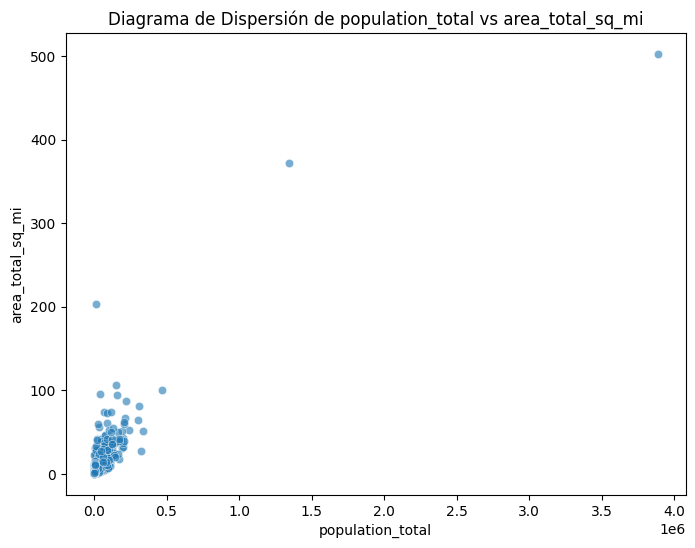

In [20]:
scatter_plot(df, 'population_total', 'area_total_sq_mi', size = 10)

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

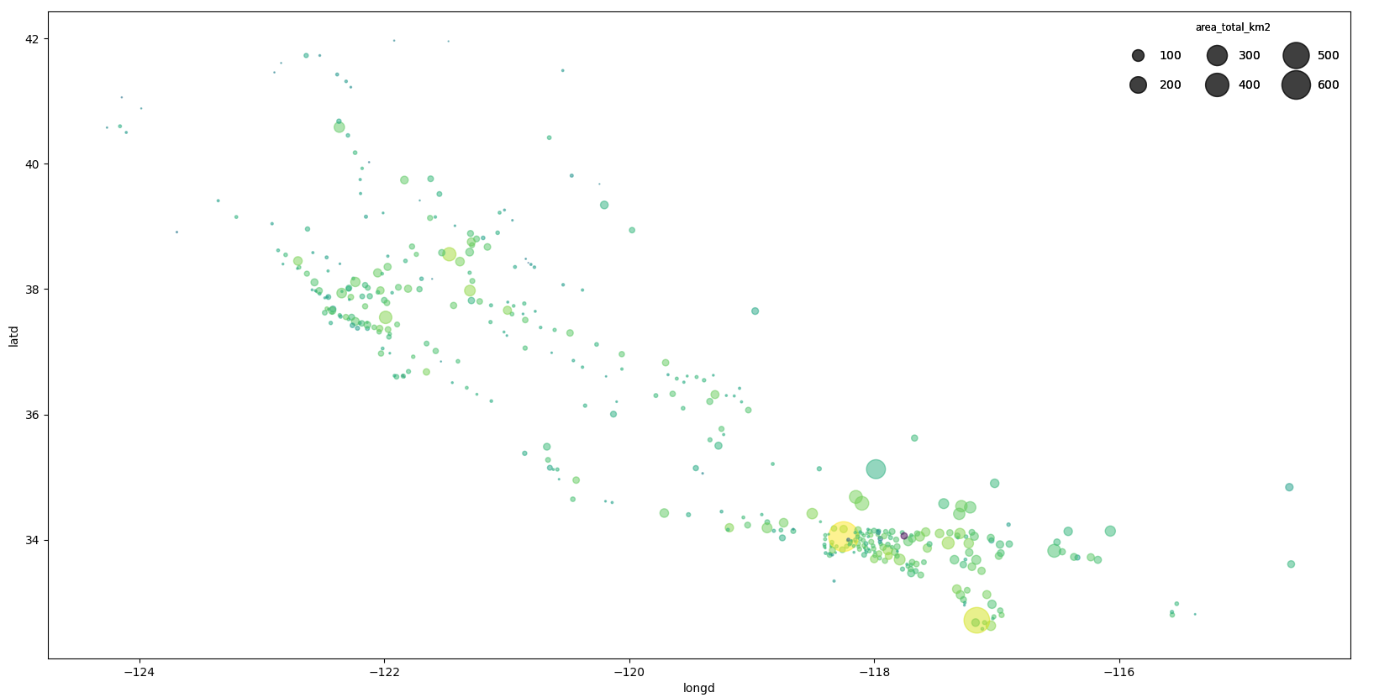

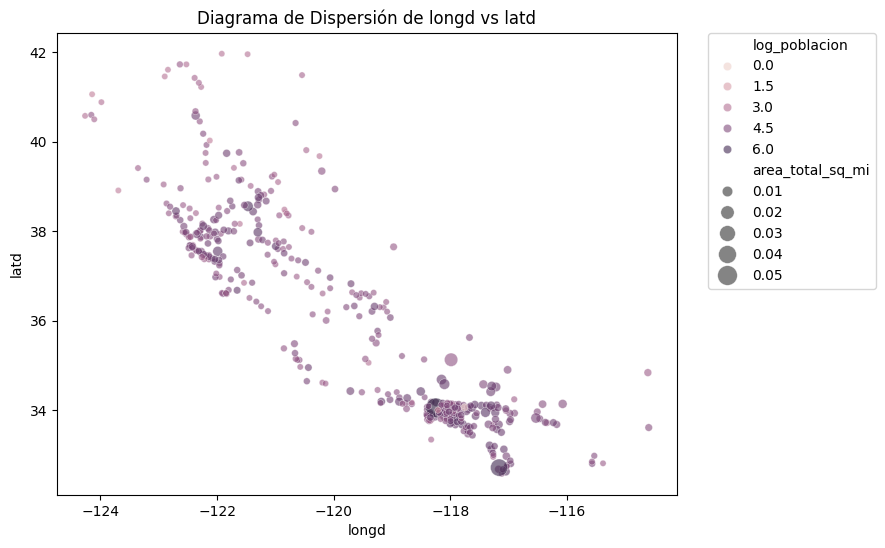

In [25]:
df['log_poblacion'] = np.log10(df['population_total'])
scatter_plot(df, 'longd', 'latd', cat_col= 'log_poblacion', size = 'area_total_sq_mi', )

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [27]:
titanic_df = pd.read_csv('./data/titanic.csv')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\jcrub\AppData\Local\Temp\ipykernel_15668\588627446.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['survived', 'Did not survive'], y=[titanic_df['survived'].mean(), 1-titanic_df['survived'].mean()], palette='deep')


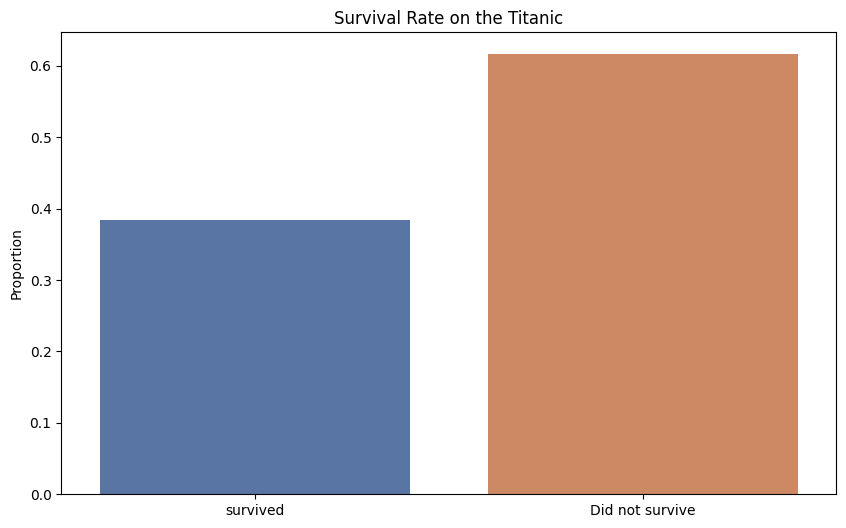

C:\Users\jcrub\AppData\Local\Temp\ipykernel_15668\588627446.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_supervivencia_sex.index, y=tasa_supervivencia_sex.values, palette='deep')


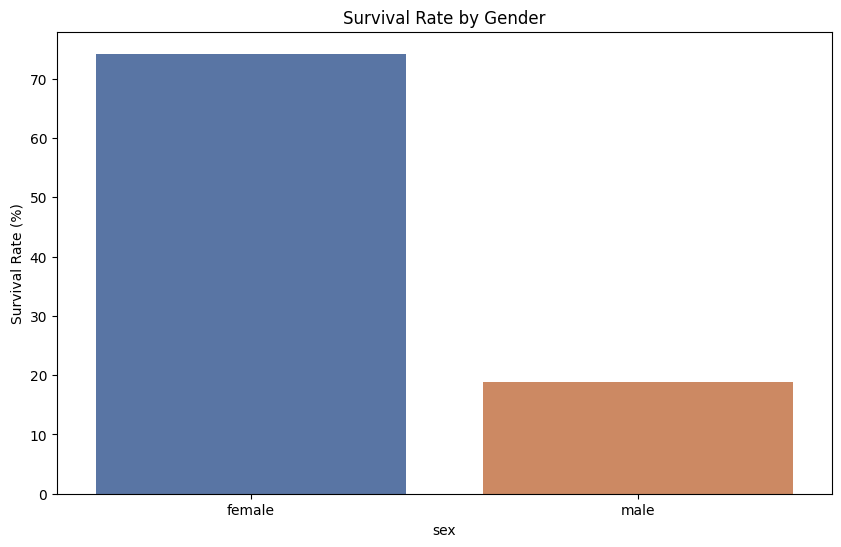

C:\Users\jcrub\AppData\Local\Temp\ipykernel_15668\588627446.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_supervivencia_clase.index, y=tasa_supervivencia_clase.values, palette='deep')


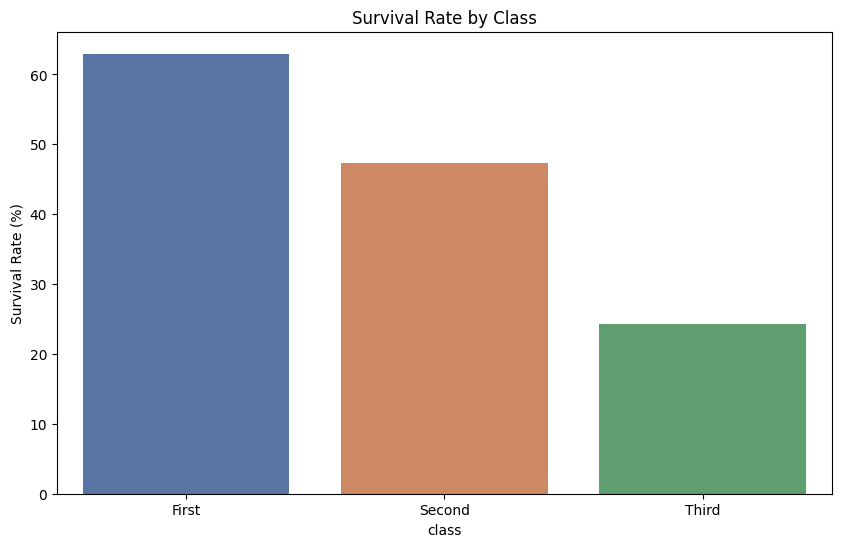

C:\Users\jcrub\AppData\Local\Temp\ipykernel_15668\588627446.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_supervivencia_mujeres_clase.index, y=tasa_supervivencia_mujeres_clase.values, palette='deep')


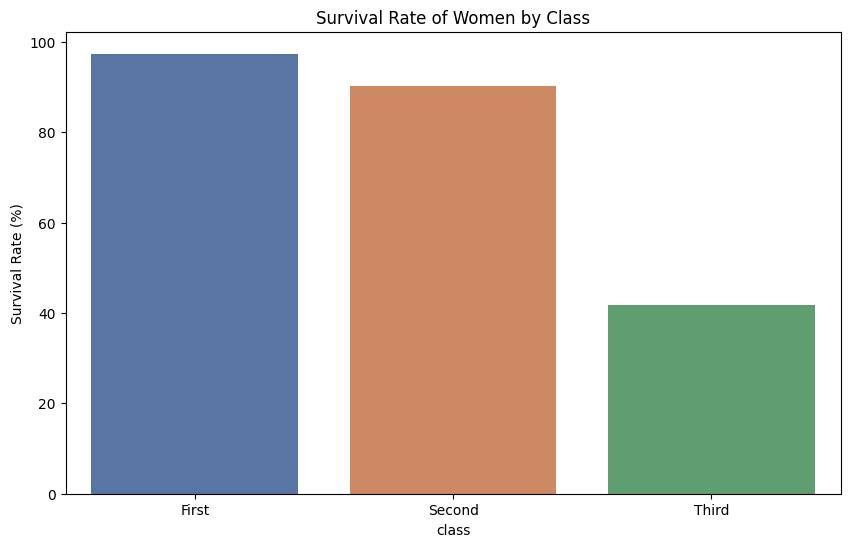

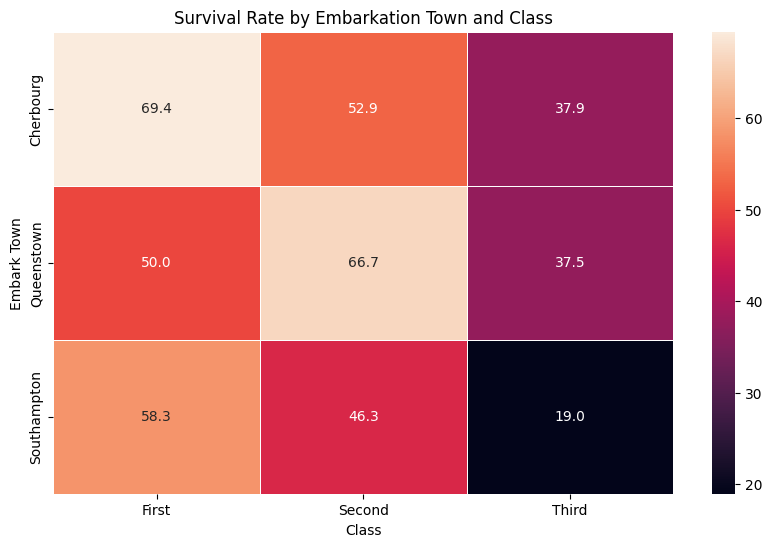

In [51]:
# 1- Tasa de mortalidad general
mortality_total = (1 - titanic_df['survived'].mean()) * 100

# 2- Tasas de supervivencia por género y por niños
tasa_supervivencia_sex = titanic_df.groupby('sex')['survived'].mean() * 100
tasa_supervivencia_niños = titanic_df[titanic_df['age'] < 18].groupby('sex')['survived'].mean() * 100

# 3- Influencia de la clase de viaje en la supervivencia
tasa_supervivencia_clase = titanic_df.groupby('class')['survived'].mean() * 100

# 4- Diferencias de tasas de supervivencia entre mujeres y niños por clase
tasa_supervivencia_mujeres_clase = titanic_df[(titanic_df['sex'] == 'female') & (titanic_df['age'] >= 18)].groupby('class')['survived'].mean() * 100
tasa_supervivencia_niños_clase = titanic_df[(titanic_df['age'] < 18)].groupby('class')['survived'].mean() * 100

# 5- Influencia del puerto de embarque y clase de viaje en la supervivencia
tasa_supervivencia_embark_clase = titanic_df.groupby(['embark_town', 'class'])['survived'].mean().unstack() * 100

# Create the visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x=['survived', 'Did not survive'], y=[titanic_df['survived'].mean(), 1-titanic_df['survived'].mean()], palette='deep')
plt.title('Survival Rate on the Titanic')
plt.ylabel('Proportion')
plt.savefig('./data/slide1_mortalidad.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=tasa_supervivencia_sex.index, y=tasa_supervivencia_sex.values, palette='deep')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate (%)')
plt.savefig('./data/slide2_supervivencia_genero.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=tasa_supervivencia_clase.index, y=tasa_supervivencia_clase.values, palette='deep')
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate (%)')
plt.savefig('./data/slide3_supervivencia_clase.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=tasa_supervivencia_mujeres_clase.index, y=tasa_supervivencia_mujeres_clase.values, palette='deep')
plt.title('Survival Rate of Women by Class')
plt.ylabel('Survival Rate (%)')
plt.savefig('./data/slide4_supervivencia_mujeres_niños_clase.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(tasa_supervivencia_embark_clase, annot=True, fmt=".1f", linewidths=.5)
plt.title('Survival Rate by Embarkation Town and Class')
plt.ylabel('Embark Town')
plt.xlabel('Class')
plt.savefig('./data/slide5_supervivencia_puerto_clase.png')
plt.show()


In [54]:
# Crear un nuevo notebook
nb = nbf.v4.new_notebook()

# Portada
text_slide_0 = """
# Análisis de Supervivencia del Titanic
### Una mirada a los factores que influyeron en las tasas de supervivencia
"""
nb['cells'] = [nbf.v4.new_markdown_cell(text_slide_0)]

# Slide 1: Alta Tasa de Mortalidad
text_slide_1 = """
## Alta Tasa de Mortalidad
El Titanic fue un desastre con una tasa de mortalidad alta.
- Tasa de mortalidad general: {:.2f}%
""".format(mortality_total)
image_slide_1 = "./data/slide1_mortalidad.png"

# Slide 2: Prioridad a Mujeres y Niños
text_slide_2 = """
## Prioridad a Mujeres y Niños
Las mujeres y los niños primero: un principio que se reflejó en las tasas de supervivencia.
- Tasa de supervivencia por género: Mujeres {:.2f}%, Hombres {:.2f}%
""".format(tasa_supervivencia_sex['female'], tasa_supervivencia_sex['male'])
image_slide_2 = "./data/slide2_supervivencia_genero.png"

# Slide 3: Clase como Factor Determinante
text_slide_3 = """
## Clase como Factor Determinante
La clase de viaje influyó significativamente en la supervivencia.
"""
image_slide_3 = "./data/slide3_supervivencia_clase.png"

# Slide 4: Diferencias por Clase entre Mujeres y Niños
text_slide_4 = """
## Diferencias por Clase entre Mujeres y Niños
Las clases altas tuvieron tasas de supervivencia superiores, incluso entre mujeres y niños.
"""
image_slide_4 = "./data/slide4_supervivencia_mujeres_niños_clase.png"

# Slide 5: Puerto de Embarque y Tipo de Pasaje
text_slide_5 = """
## Puerto de Embarque y Tipo de Pasaje
El puerto de embarque refleja diferencias, posiblemente debido al tipo de pasaje.  Como se ve en el mapa de calor, la tasa de superviviencia es mayor en primera y segunda clase con respectos a tercera independientemente de la ciudad de embarque.

Este gráfico lo que muestra es el porcentaje de supervivencia por grupo, según ciudad de embarque y clase.
"""
image_slide_5 = "./data/slide5_supervivencia_puerto_clase.png"

# Añadir las celdas de texto e imágenes al notebook
slides = [text_slide_1, image_slide_1, text_slide_2, image_slide_2, text_slide_3, image_slide_3, text_slide_4, image_slide_4, text_slide_5, image_slide_5]
for i in range(0, len(slides), 2):
    nb['cells'].append(nbf.v4.new_markdown_cell(slides[i]))
    nb['cells'].append(nbf.v4.new_code_cell("from IPython.display import Image\nImage('{}')".format(slides[i+1])))

# Guardar el notebook
with open('./Titanic_Presentation.ipynb', 'w') as f:
    nbf.write(nb, f)
'./data/Titanic_Presentation.ipynb'


'./data/Titanic_Presentation.ipynb'